# Membership_Retention

## EDA

In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('Membership_Retention.csv')


**The data:**

| Field Name                           | Meaning   |
|--------------------------------------|------------------------|
| CustomerID                           | CustomerID                 |
| Gender                               | Gender                   |
| RP                                   | Rose package               |
| VP                                   | Violet package             |
| TP                                   | Tulip package             |
| LP                                   | Lily package               |
| CP                                   | Carnation package             |
| OP                                   | Orchid package             |
| BP                                   | Birthday package               |
| VDP                                  | Valentine's Day package             |
| MCT                                  | Membership card type             |
| MM                                   | Months of membership               |
| MFPM                                 | Membership fee payment method           |
| AME                                  | Average monthly expenditure             |
| Total Expenditure                    | Total Expenditure                 |
| MFPS                                 | Membership fee payment status             |

In [3]:
df.head()

,CustomerID,Gender,RP,VP,TP,LP,CP,OP,BP,VDP,MCT,MM,MFPM,AME,TotalExpenditure,MFPS
0,1,Female,Yes,Yes,No,Yes,No,Yes,Yes,No,Annualcard,9,ManualTransfer,65.6,593.3,No
1,2,Male,No,No,No,No,No,No,No,Yes,Monthcard,9,ManualTransfer,59.9,542.4,No
2,3,Male,No,No,No,No,Yes,No,No,No,Monthcard,4,CashPayment,73.9,280.85,Yes
3,4,Male,Yes,No,No,Yes,Yes,No,Yes,Yes,Monthcard,13,CashPayment,98.0,1237.85,Yes
4,5,Female,No,Yes,No,No,No,Yes,Yes,Yes,Monthcard,9,InstallmentPayment,69.4,571.45,No


In [4]:
df.describe()

,CustomerID,MM,AME
count,7043.000000,7043.000000,7043.000000
mean,3522.000000,32.371149,64.761692
std,2033.283305,24.559481,30.090047
min,1.000000,0.000000,18.250000
25%,1761.500000,9.000000,35.500000
50%,3522.000000,29.000000,70.350000
75%,5282.500000,55.000000,89.850000
max,7043.000000,72.000000,118.750000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   CustomerID        7043 non-null   int64  
 1   Gender            7043 non-null   object 
 2   RP                7043 non-null   object 
 3   VP                7043 non-null   object 
 4   TP                7043 non-null   object 
 5   LP                7043 non-null   object 
 6   CP                7043 non-null   object 
 7   OP                7043 non-null   object 
 8   BP                7043 non-null   object 
 9   VDP               7043 non-null   object 
 10  MCT               7043 non-null   object 
 11  MM                7043 non-null   int64  
 12  MFPM              7043 non-null   object 
 13  AME               7043 non-null   float64
 14  TotalExpenditure  7043 non-null   object 
 15  MFPS              7043 non-null   object 
dtypes: float64(1), int64(2), object(13)
memory

## Feature engineer

In [6]:
df['TotalExpenditure']

0         593.3
1         542.4
2        280.85
3       1237.85
4        571.45
         ...   
7038      742.9
7039      92.75
7040     1873.7
7041    4627.65
7042     3707.6
Name: TotalExpenditure, Length: 7043, dtype: object

In [7]:
# convert data type of RP, vp... to 1 and 0
def convert_str_to_bool(row):
    result = 0
    if row == 'Yes':
        result = 1
    return result

def convert_gender_to_bool(row):
    result = 0
    if row == 'Male':
        result = 1
    return result

def convert_TotalExpenditure_to_number(row):
    if row['TotalExpenditure'] == '' or row['TotalExpenditure'] == ' ':
        return float(row['MM']*row['AME'])
    else:
        return float(row['TotalExpenditure'])

df['Gender_bool'] = df['Gender'].apply(convert_str_to_bool)

df['RP_bool'] = df['RP'].apply(convert_str_to_bool)
df['VP_bool'] = df['VP'].apply(convert_str_to_bool)
df['TP_bool'] = df['TP'].apply(convert_str_to_bool)
df['LP_bool'] = df['LP'].apply(convert_str_to_bool)
df['CP_bool'] = df['CP'].apply(convert_str_to_bool)
df['OP_bool'] = df['OP'].apply(convert_str_to_bool)
df['BP_bool'] = df['BP'].apply(convert_str_to_bool)
df['VDP_bool'] = df['VDP'].apply(convert_str_to_bool)

df['TotalExpenditure_numerical'] = df.apply(lambda x: convert_TotalExpenditure_to_number(x), axis = 1)

df['Target'] = df['MFPS'].apply(convert_str_to_bool)

In [8]:
df['MCT'].unique()

array(['Annualcard ', 'Monthcard', 'Biennialcard'], dtype=object)

In [9]:
# Creating dummy variables for MCT
dummies = pd.get_dummies(df['MCT'])
# To add these dummies back into the original DataFrame:
df_with_dummies = pd.concat([df, dummies], axis=1)
# Creating dummy variables for MCT
dummies = pd.get_dummies(df['MFPM'])
# To add these dummies back into the original DataFrame:
df_with_dummies = pd.concat([df_with_dummies, dummies], axis=1)

In [10]:
df_with_dummies

,CustomerID,Gender,RP,VP,TP,LP,CP,OP,BP,VDP,...,VDP_bool,TotalExpenditure_numerical,Target,Annualcard,Biennialcard,Monthcard,Auto-debit,CashPayment,InstallmentPayment,ManualTransfer
0,1,Female,Yes,Yes,No,Yes,No,Yes,Yes,No,...,0,593.30,0,True,False,False,False,False,False,True
1,2,Male,No,No,No,No,No,No,No,Yes,...,1,542.40,0,False,False,True,False,False,False,True
2,3,Male,No,No,No,No,Yes,No,No,No,...,0,280.85,1,False,False,True,False,True,False,False
3,4,Male,Yes,No,No,Yes,Yes,No,Yes,Yes,...,1,1237.85,1,False,False,True,False,True,False,False
4,5,Female,No,Yes,No,No,No,Yes,Yes,Yes,...,1,571.45,0,False,False,True,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,7039,Female,No,No,Yes,No,No,Yes,No,No,...,0,742.90,0,True,False,False,False,False,False,True
7039,7040,Male,No,No,No,Yes,No,No,No,No,...,0,92.75,0,False,False,True,False,False,False,True
7040,7041,Male,Yes,No,No,No,No,No,No,Yes,...,1,1873.70,1,False,False,True,False,True,False,False
7041,7042,Male,Yes,Yes,Yes,No,Yes,Yes,No,Yes,...,1,4627.65,0,False,True,False,False,False,False,True


In [11]:
df_with_dummies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 34 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   CustomerID                  7043 non-null   int64  
 1   Gender                      7043 non-null   object 
 2   RP                          7043 non-null   object 
 3   VP                          7043 non-null   object 
 4   TP                          7043 non-null   object 
 5   LP                          7043 non-null   object 
 6   CP                          7043 non-null   object 
 7   OP                          7043 non-null   object 
 8   BP                          7043 non-null   object 
 9   VDP                         7043 non-null   object 
 10  MCT                         7043 non-null   object 
 11  MM                          7043 non-null   int64  
 12  MFPM                        7043 non-null   object 
 13  AME                         7043 

In [12]:
df_with_dummies.columns

Index(['CustomerID', 'Gender', 'RP', 'VP', 'TP', 'LP', 'CP', 'OP', 'BP', 'VDP',
       'MCT', 'MM', 'MFPM', 'AME', 'TotalExpenditure', 'MFPS', 'Gender_bool',
       'RP_bool', 'VP_bool', 'TP_bool', 'LP_bool', 'CP_bool', 'OP_bool',
       'BP_bool', 'VDP_bool', 'TotalExpenditure_numerical', 'Target',
       'Annualcard ', 'Biennialcard', 'Monthcard', 'Auto-debit', 'CashPayment',
       'InstallmentPayment', 'ManualTransfer'],
      dtype='object')

In [13]:
features = ['MM', 'AME', "TotalExpenditure_numerical", 'Gender_bool','RP_bool', 'VP_bool', 'TP_bool', 'LP_bool', 'CP_bool', 'OP_bool',
       'BP_bool', 'VDP_bool','Annualcard ', 'Biennialcard',
       'Monthcard', 'Auto-debit', 'CashPayment', 'InstallmentPayment',
       'ManualTransfer']

In [14]:
df_x = df_with_dummies[features]

In [15]:
df_x.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 19 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   MM                          7043 non-null   int64  
 1   AME                         7043 non-null   float64
 2   TotalExpenditure_numerical  7043 non-null   float64
 3   Gender_bool                 7043 non-null   int64  
 4   RP_bool                     7043 non-null   int64  
 5   VP_bool                     7043 non-null   int64  
 6   TP_bool                     7043 non-null   int64  
 7   LP_bool                     7043 non-null   int64  
 8   CP_bool                     7043 non-null   int64  
 9   OP_bool                     7043 non-null   int64  
 10  BP_bool                     7043 non-null   int64  
 11  VDP_bool                    7043 non-null   int64  
 12  Annualcard                  7043 non-null   bool   
 13  Biennialcard                7043 

In [16]:
df_y = df_with_dummies['Target']

In [17]:
df_y.mean()

0.2653698707936959

### as we can see that this is an imbalanced data, so we will do oversampling

In [18]:
from imblearn.over_sampling import SMOTE

smote = SMOTE()
X, y = smote.fit_resample(df_x, df_y)


In [19]:
y.mean()

0.5

## data splitting and normalization

In [20]:
from sklearn.ensemble import RandomForestClassifier  # RandomForestRegressor
import xgboost as xgb
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split


In [21]:
X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size=0.2, random_state=42)  # 20% testing
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.25, random_state=42) # 20% validation

In [23]:
X_train

,MM,AME,TotalExpenditure_numerical,Gender_bool,RP_bool,VP_bool,TP_bool,LP_bool,CP_bool,OP_bool,BP_bool,VDP_bool,Annualcard,Biennialcard,Monthcard,Auto-debit,CashPayment,InstallmentPayment,ManualTransfer
7369,2,54.951159,107.902407,0,0,0,1,0,0,0,0,0,False,False,True,False,False,False,True
3020,68,75.800000,5293.950000,0,1,1,0,1,1,1,0,1,True,False,False,True,False,False,False
859,43,50.200000,2169.400000,0,1,1,0,1,0,0,0,0,False,False,True,False,False,False,True
3881,17,80.500000,1336.900000,0,1,0,0,1,0,0,0,0,False,False,True,True,False,False,False
5421,8,38.500000,330.800000,0,0,1,1,0,0,0,0,1,False,False,True,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2696,7,85.200000,602.550000,0,0,0,0,0,0,0,0,1,False,False,True,False,False,False,True
442,18,73.550000,1359.450000,0,0,0,0,1,0,0,0,0,False,False,True,False,True,False,False
1800,62,23.650000,1416.750000,0,1,0,0,0,0,0,0,0,False,True,False,True,False,False,False
6594,52,19.850000,1070.500000,0,1,1,0,0,0,0,0,0,False,True,False,False,False,False,True


In [24]:
from sklearn.preprocessing import StandardScaler

In [25]:
scaler = StandardScaler()
X_train_val[['MM', 'AME', 'TotalExpenditure_numerical']] = scaler.fit_transform(X_train_val[['MM', 'AME', 'TotalExpenditure_numerical']])
X_test[['MM', 'AME', 'TotalExpenditure_numerical']] = scaler.transform(X_test[['MM', 'AME', 'TotalExpenditure_numerical']])

In [26]:
X_train_val

,MM,AME,TotalExpenditure_numerical,Gender_bool,RP_bool,VP_bool,TP_bool,LP_bool,CP_bool,OP_bool,BP_bool,VDP_bool,Annualcard,Biennialcard,Monthcard,Auto-debit,CashPayment,InstallmentPayment,ManualTransfer
4541,-0.103963,-0.255900,-0.227355,0,0,0,1,1,1,0,1,1,True,False,False,False,True,False,False
5709,-1.106897,0.104929,-0.903051,0,0,0,0,0,0,0,0,0,False,False,True,False,False,False,True
7393,-0.772586,0.157577,-0.619072,0,0,0,0,1,0,0,0,0,False,False,True,False,True,False,False
10026,0.104982,-1.197113,-0.459841,0,0,0,0,0,0,0,0,0,False,True,True,True,False,False,False
3578,1.651174,-0.495869,0.829763,0,1,1,1,1,0,0,0,0,False,True,False,True,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5734,-0.563641,-1.305107,-0.742804,0,0,0,0,1,0,0,0,0,False,False,True,False,False,False,True
5191,-1.106897,-1.723738,-0.927063,0,0,0,0,0,0,0,0,0,False,False,True,False,False,False,True
5390,-1.106897,-1.709726,-0.926879,0,0,0,0,0,0,0,0,0,False,False,True,False,False,False,True
860,1.024339,-1.525808,-0.370466,0,1,1,0,0,0,0,0,0,False,True,False,False,False,False,True


## Model building

In [27]:
rf = RandomForestClassifier()
rf.fit(X_train_val, y_train_val)

xgb_model = xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss')
xgb_model.fit(X_train_val, y_train_val)

logistic = LogisticRegression()
logistic.fit(X_train_val, y_train_val)

LogisticRegression()

In [28]:
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import cross_val_score

# def calculate_accuracy(y_true, y_pred):
#     return accuracy_score(y_true, y_pred)

# def calculate_recall(y_true, y_pred):
#     return recall_score(y_true, y_pred)

# def calculate_f1_score(y_true, y_pred):
#     return f1_score(y_true, y_pred, average='binary')  

def get_confusion_matrix(y_true, y_pred):
    return confusion_matrix(y_true, y_pred)

def model_evaluation(model):        
    pred_train = model.predict(X_train_val)
    recall_train =  cross_val_score(model, X_train_val, y_train_val, cv=5, scoring='recall')
    roc_train = cross_val_score(model, X_train_val, y_train_val, cv=5, scoring='roc_auc')
    f1_train =  cross_val_score(model, X_train_val, y_train_val, cv=5, scoring='f1')
    conf_matrix_train = get_confusion_matrix(y_train_val, pred_train)

    print('train roc: ', roc_train, "mean: ", roc_train.mean())
    print('training recall: ', recall_train, "mean: ", recall_train.mean())
    print('f1: ', f1_train,  "mean: ", f1_train.mean())

    print('conf_matrix_train: ', conf_matrix_train)

    # print('training roc: ', roc_train, "mean: ", roc_train.mean(), 'val roc: ', roc_val, "mean: ", roc_val.mean())
    # print('training recall: ', recall_train, "mean: ", recall_train.mean(), 'val recall: ', recall_val, "mean: ", recall_val.mean())
    # print('f1: ', f1_train,  "mean: ", f1_train.mean(), 'f1_val: ', f1_val, "mean: ", f1_val.mean())

    # print('conf_matrix_train: ', conf_matrix_train)
    # print('conf_matrix_val: ', conf_matrix_val)

In [29]:
model_evaluation(rf)

train roc:  [0.91650391 0.93183174 0.92850464 0.92379475 0.91693465] mean:  0.9235139387098457
training recall:  [0.83917775 0.8694075  0.82829504 0.8452237  0.81741233] mean:  0.8399032648125756
f1:  [0.83333333 0.86059143 0.84681373 0.852657   0.83189122] mean:  0.8450573435366332
conf_matrix_train:  [[4122   21]
 [   8 4127]]


In [30]:
model_evaluation(xgb_model)

train roc:  [0.91885738 0.93992412 0.93009307 0.92792688 0.91772617] mean:  0.9269055256832399
training recall:  [0.84401451 0.87303507 0.84401451 0.85126965 0.82829504] mean:  0.8481257557436518
f1:  [0.82554701 0.86003574 0.84811665 0.84564565 0.82679541] mean:  0.8412280909234406
conf_matrix_train:  [[3859  284]
 [ 202 3933]]


In [36]:
model_evaluation(logistic)

train roc:  [0.91653673 0.93638553 0.93078592 0.92740407 0.91981596] mean:  0.9261856408242863
training recall:  [0.85368803 0.85852479 0.82466747 0.85368803 0.82950423] mean:  0.8440145102781136
f1:  [0.83254717 0.85490668 0.83938462 0.84348865 0.82700422] mean:  0.8394662674533467
conf_matrix_train:  [[3459  684]
 [ 632 3503]]


## Model optimization

In [31]:
from sklearn.model_selection import GridSearchCV

# Sample parameters to tune
param_grid = {
    'n_estimators': [100, 200, 300, 500],
    'max_depth': [2, 10, 5, 20],
    'min_samples_split': [2, 5,3, 10]
}

# Create a GridSearchCV instance
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, n_jobs=-1, scoring='recall')

# Fit the grid search to the data
grid_search.fit(X_train_val, y_train_val)

# Best parameters and score
best_params = grid_search.best_params_
best_score = grid_search.best_score_
best_rf = grid_search.best_estimator_

In [32]:
best_params

{'max_depth': 2, 'min_samples_split': 10, 'n_estimators': 100}

In [33]:
model_evaluation(best_rf) #best result before resampling is .5 in recall, .56 in F1

train roc:  [0.86383778 0.8831593  0.88112964 0.89315829 0.8611761 ] mean:  0.8764922218144449
training recall:  [0.88875453 0.89963724 0.85973398 0.88391778 0.87424426] mean:  0.8812575574365177
f1:  [0.79062159 0.81403118 0.80370585 0.82209945 0.80546448] mean:  0.8071845098458331
conf_matrix_train:  [[2916 1227]
 [ 517 3618]]


In [183]:
# Sample parameters to tune
param_grid = {
    'n_estimators': [100, 200, 300, 500],
    'max_depth': [3, 5, 2],
    'learning_rate': [0.01, 0.1, 0.5, 0.05],
    'subsample': [0.5, 0.7, .2, .1]
}

# Create a GridSearchCV instance
grid_search = GridSearchCV(estimator=xgb_model, param_grid=param_grid, cv=5, n_jobs=-1, scoring='recall')

# Fit the grid search to the data
grid_search.fit(X_train_val, y_train_val)

# Best parameters and score
best_params_xgb = grid_search.best_params_
best_score_xgb = grid_search.best_score_
best_xgb = grid_search.best_estimator_

In [184]:
best_params_xgb

{'learning_rate': 0.01, 'max_depth': 2, 'n_estimators': 100, 'subsample': 0.7}

In [185]:
model_evaluation(best_xgb) #best result before resampling is .526 in recall, .58 in F1

train roc:  [0.8558125  0.87866531 0.86851264 0.8739938  0.86209321] mean:  0.867815492496562
training recall:  [0.89117291 0.89480048 0.8814994  0.91051995 0.86215236] mean:  0.8880290205562276
f1:  [0.79546681 0.81497797 0.79067245 0.81011296 0.79222222] mean:  0.8006904843040246
conf_matrix_train:  [[2525 1618]
 [ 342 3793]]


In [186]:
logistic = LogisticRegression(max_iter=5000)

param_grid = {
    'C': [0.01, 0.1, 1, 10, 100],
    'penalty': ['l1', 'l2'],
    'solver': ['liblinear', 'saga']  # These solvers are good for both l1 and l2 penalties
}

# Create a GridSearchCV instance
grid_search = GridSearchCV(estimator=logistic, param_grid=param_grid, cv=5, n_jobs=-1, scoring='recall')

# Fit the grid search to the data
grid_search.fit(X_train_val, y_train_val)

# Best parameters and score
best_params_logistic = grid_search.best_params_
best_score_logistic = grid_search.best_score_
best_logistic = grid_search.best_estimator_

In [187]:
model_evaluation(best_logistic) #best result before resampling is .516 in recall, .57 in F1

train roc:  [0.90701928 0.92715251 0.9222472  0.91939976 0.91306173] mean:  0.9177760958635712
training recall:  [0.84643289 0.8573156  0.83675937 0.84643289 0.83555018] mean:  0.8444981862152356
f1:  [0.82015231 0.84808612 0.84133739 0.8328376  0.82458234] mean:  0.833399151998424
conf_matrix_train:  [[3741  402]
 [1415 2720]]


## Interpret results

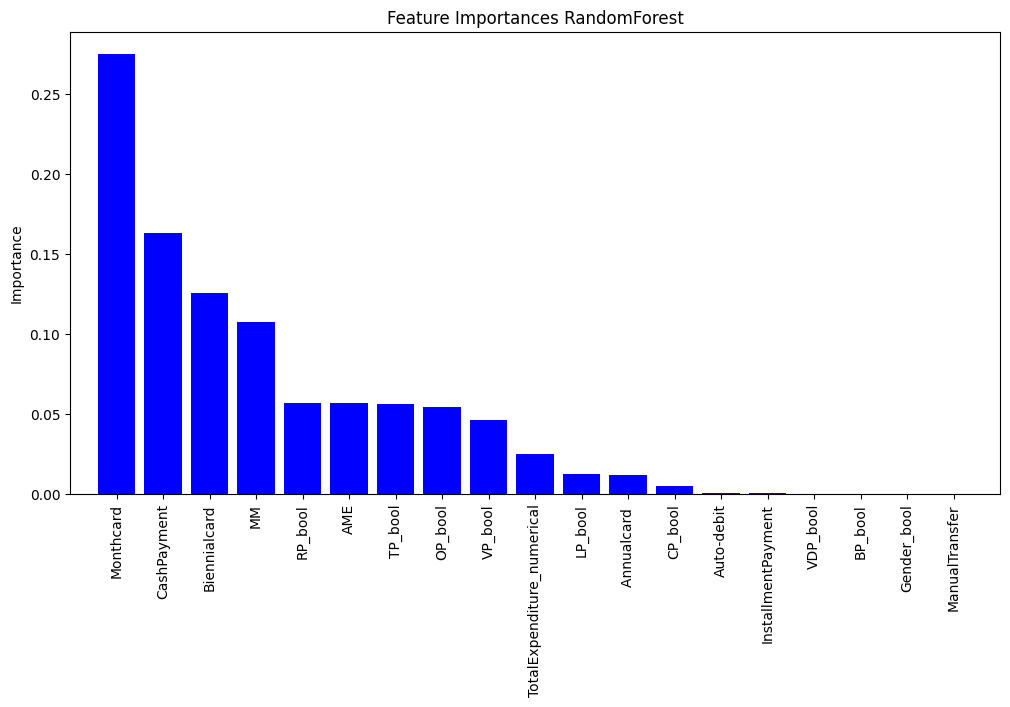

In [188]:
import matplotlib.pyplot as plt
import numpy as np

# Get feature importances
importances = best_rf.feature_importances_

# Sort the feature importances in descending order
indices = np.argsort(importances)[::-1]

# Plotting
plt.figure(figsize=(12, 6))
plt.title('Feature Importances RandomForest')
plt.bar(range(X_train_val.shape[1]), importances[indices], color="b", align="center")
plt.xticks(range(X_train_val.shape[1]), X_train_val.columns[indices], rotation=90)
plt.xlim([-1, X_train_val.shape[1]])
plt.ylabel('Importance')
plt.show()


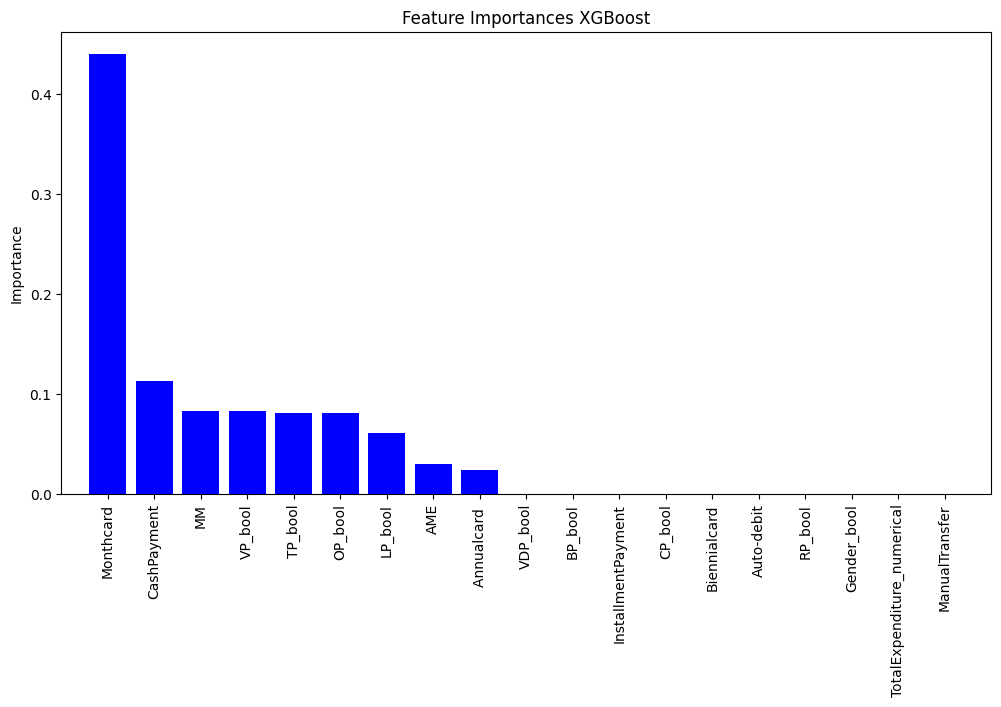

In [189]:
# Get feature importances
importances = best_xgb.feature_importances_

# Sort the feature importances in descending order
indices = np.argsort(importances)[::-1]

# Plotting
plt.figure(figsize=(12, 6))
plt.title('Feature Importances XGBoost')
plt.bar(range(X_train_val.shape[1]), importances[indices], color="b", align="center")
plt.xticks(range(X_train_val.shape[1]), X_train_val.columns[indices], rotation=90)
plt.xlim([-1, X_train_val.shape[1]])
plt.ylabel('Importance')
plt.show()

## Best model

According to our gridsearch result, the best model with highest recall after resampling is 

RandomForest with recall =  0.8726604787599195, roc = 0.8889963724304716 as the mean of k-fold validation

In [191]:
# result in testing dataset 
pred_test = best_rf.predict(X_test)
recall_test = cross_val_score(best_rf, X_test, y_test, cv=5, scoring='recall')
roc_test = cross_val_score(best_rf, X_test, y_test, cv=5, scoring='roc_auc')
f1_test = cross_val_score(best_rf, X_test, y_test, cv=5, scoring='f1')
conf_matrix_test = get_confusion_matrix(y_test, pred_test)

print('test roc: ', roc_test, "mean: ", roc_test.mean())
print('test recall: ', recall_test, "mean: ", recall_test.mean())
print('f1_test: ', f1_test, "mean: ", f1_test.mean())

print('conf_matrix_test: ', conf_matrix_test)

test roc:  [0.87488331 0.88214152 0.87034401 0.86874533 0.88647343] mean:  0.8765175201949684
test recall:  [0.84615385 0.84134615 0.85096154 0.88461538 0.92753623] mean:  0.8701226309921962
f1_test:  [0.78666667 0.80361174 0.8        0.81578947 0.82729211] mean:  0.8066719978748124
conf_matrix_test:  [[639 392]
 [ 97 942]]
